# Used Car Price Prediction

## End to End Machine Learning Project

## 1. Understanding Problem Statement

**Problem Statement:**

The used car market in India is highly dynamic, with prices varying widely due to factors such as the car's make and model, mileage, condition, and current market trends. This variability often makes it challenging for sellers to determine accurate pricing for their vehicles.

**Objective:**

To develop a machine learning model capable of predicting the price of a used car based on its features.

**Proposed Approach:**

We aim to create a machine learning model trained on a dataset of used cars sold on Cardekho.com in India. This model will use car-specific features to predict prices accurately, enabling sellers and buyers to make informed decisions.

#### Benefits:

**Accurate Pricing for Sellers**: Sellers can set realistic prices, helping them sell their cars faster and achieve better returns.

**Competitive Pricing for Buyers**: Buyers will have access to fairly priced options, enhancing their purchasing experience.

**Market Efficiency**: The overall efficiency of the Indian used car market will improve with standardized pricing predictions.

## Import Data and Required Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Download and Import the CSV Data as Pandas DataFrame

In [6]:
df = pd.read_csv("C:\\Users\\sulai\\Downloads\\cardekho_dataset.csv\\cardekho_dataset.csv",index_col=[0])
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


##  Understanding the Data and Data Description

In [8]:
#To get the insights of top 5 rows and columns
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [9]:
#To get the insights of bottom 5 rows and columns
df.tail()


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [10]:
#To know the columns in the dataframe
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [11]:
print('The size of the DataFrame :', df.shape)

The size of the DataFrame : (15411, 13)


In [12]:
print('COLUMN NAME,RECORD COUNT AND DATATYPES ARE AS FOLLOWS:')
df.info()

COLUMN NAME,RECORD COUNT AND DATATYPES ARE AS FOLLOWS:
<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [13]:
#To get insights of the datatypes in the dataframe
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [14]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
df.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


## Defining Numerical and Categorical Columns

In [16]:
num_df = df.select_dtypes(include="number")
cat_df = df.select_dtypes(include="object_")
num_df

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
0,9,120000,19.70,796,46.30,5,120000
1,5,20000,18.90,1197,82.00,5,550000
2,11,60000,17.00,1197,80.00,5,215000
3,9,37000,20.92,998,67.10,5,226000
4,6,30000,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...
19537,9,10723,19.81,1086,68.05,5,250000
19540,2,18000,17.50,1373,91.10,7,925000
19541,6,67000,21.14,1498,103.52,5,425000
19542,5,3800000,16.00,2179,140.00,7,1225000


In [17]:
cat_df

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
1,Hyundai Grand,Hyundai,Grand,Individual,Petrol,Manual
2,Hyundai i20,Hyundai,i20,Individual,Petrol,Manual
3,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
4,Ford Ecosport,Ford,Ecosport,Dealer,Diesel,Manual
...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,Dealer,Petrol,Manual
19540,Maruti Ertiga,Maruti,Ertiga,Dealer,Petrol,Manual
19541,Skoda Rapid,Skoda,Rapid,Dealer,Diesel,Manual
19542,Mahindra XUV500,Mahindra,XUV500,Dealer,Diesel,Manual


In [18]:
print(f'We have {len(num_df.columns)} numerical columns:', num_df.columns.tolist())
print(f'We have {len(cat_df.columns)} categorical columns:', cat_df.columns.tolist())


We have 7 numerical columns: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical columns: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Data Decritption(Feature Information)
* ___car_name___: Car's Full name, which includes brand and specific model name.
* ___brand___: Brand Name of the particular car.
* ___model___: Exact model name of the car of a particular brand.
* ___seller_type___: Which Type of seller is selling the used car
* ___fuel_type___: Fuel used in the used car, which was put up on sale.
* ___transmission_type___: Transmission used in the used car, which was put on sale.
* ___vehicle_age___: The count of years since car was bought.
* ___mileage___: It is the number of kilometer the car runs per litre.
* ___engine___: It is the engine capacity in cc(cubic centimeters)
* ___max_power___: Max power it produces in BHP.
* ___seats___: Total number of seats in car.
* ___selling_price___: The sale price which was put up on website.

In [20]:
print('Missing Value Presence in different columns of DataFrame are as follows: ')
print('-'*100)
total = df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count()*100)
pd.concat([total,percent], axis=1, keys=['Total','Percent'])

Missing Value Presence in different columns of DataFrame are as follows: 
----------------------------------------------------------------------------------------------------


,Total,Percent
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


After inspecting the dataframe, **no missing values** found.



In [22]:
# Update seats where it is 0
df.loc[df["seats"] == 0, "seats"] = 5

In [23]:
# Display only car_name and seats for the specific cars
print(df.loc[df["car_name"].isin(["Nissan Kicks"]), ["car_name", "seats"]])
print(df.loc[df["car_name"].isin(["Honda City"]), ["car_name", "seats"]])


           car_name  seats
1618   Nissan Kicks      5
3170   Nissan Kicks      5
3961   Nissan Kicks      5
6266   Nissan Kicks      5
12365  Nissan Kicks      5
15992  Nissan Kicks      5
16701  Nissan Kicks      5
18102  Nissan Kicks      5
         car_name  seats
29     Honda City      5
33     Honda City      5
46     Honda City      5
90     Honda City      5
102    Honda City      5
...           ...    ...
19435  Honda City      5
19440  Honda City      5
19492  Honda City      5
19514  Honda City      5
19543  Honda City      5

[757 rows x 2 columns]


In [24]:
print('-'*125)
print('Checking records for mis-spell, typo-error etc')
print('-'*125)

print("'car_name' variable have {} unique_category : \n{}\n".format(df['car_name'].nunique(), df['car_name'].unique()))
print('-'*125)

print("'brand' variable have {} unique_category : \n{}\n".format(df['brand'].nunique(), df['brand'].unique()))
print('-'*125)

print("'model' variable have {} unique_category : \n{}\n".format(df['model'].nunique(), df['model'].unique()))
print('-'*125)

print("'seller_type' variable have {} unique_category : \n{}\n".format(df['seller_type'].nunique(),df['seller_type'].unique()))
print('-'*125)

print("'fuel_type' variable have {} unique_category : \n{}\n".format(df['fuel_type'].nunique(),df['fuel_type'].unique()))
print('-'*125)

print("'transmission_type' variable have {} unique_category : \n{}\n".format(df['transmission_type'].nunique(),df['transmission_type'].unique()))
print('-'*125)

-----------------------------------------------------------------------------------------------------------------------------
Checking records for mis-spell, typo-error etc
-----------------------------------------------------------------------------------------------------------------------------
'car_name' variable have 121 unique_category : 
['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endeav

In [25]:
print('-'*100)
print('The percentage of each category in categorical columns are as follow:')
print('-'*100+'\n')
for col in cat_df:
    print(df[col].value_counts(normalize=True)*100) #normalize=True: Converts the counts into proportions (relative frequencies)
    print('-'*100)

----------------------------------------------------------------------------------------------------
The percentage of each category in categorical columns are as follow:
----------------------------------------------------------------------------------------------------

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
----------------------------------------------------------------------------------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW     

* from above analysis
#### car_name
- **Total Categories:** 121
- **Most Frequent Category:** Hyundai i20 (5.88%)

#### brand
- **Total Categories:** 32
- **Most Frequent Category:** Maruti (32.39%)
#### model
- **Total Categories:** 120
- **Most Frequent Category:** i20 (5.88%)
#### seller_type
- **Total Categories:** 3
- **Most Frequent Category:** Dealer (61.90%)
- **Least Frequent Category:** Trustmark Dealer (1.12%)
#### fuel_type
- **Total Categories:** 5
- **Most Frequent Category:** Petrol (49.59%)
- **Least Frequent Category:** Electric (0.03%)
#### transmission_type
- **Total Categories:** 2
- **Most Frequent Category:** Manual (79.33%)
- **Least Frequent Category:** Automatic (20.67%)

In [27]:
#Defines maximum value in the list
df['selling_price'].max()

39500000

In [28]:
#Defines mainimum value in the list
df['selling_price'].min()

40000

# Exploratory Data Analysis

#### *Univariate Analysis**

Numerical Features

#### Selling Price Distribution (Target Feature Distribution)

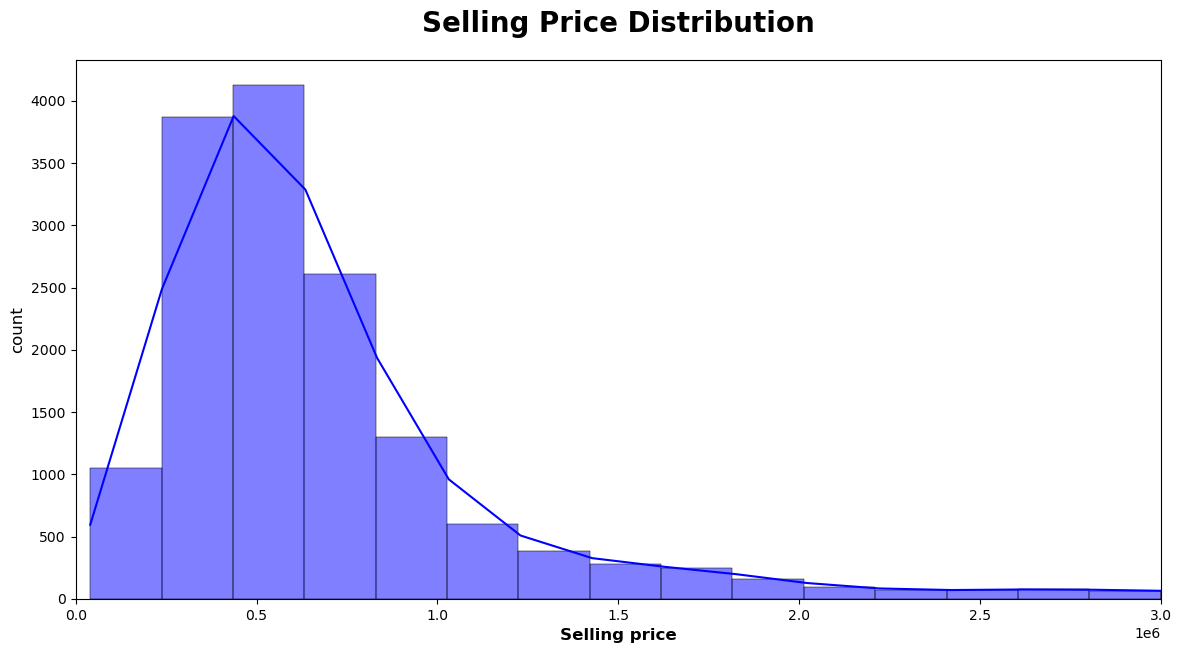

In [30]:
plt.subplots(figsize=(14,7))
sns.histplot(df.selling_price, bins=200, kde=True, color='b')
plt.title('Selling Price Distribution', fontsize=20,weight='bold',pad=20)
plt.ylabel('count',fontsize=12)
plt.xlabel('Selling price',weight='bold',fontsize=12)
plt.xlim(0,3000000)
plt.show()

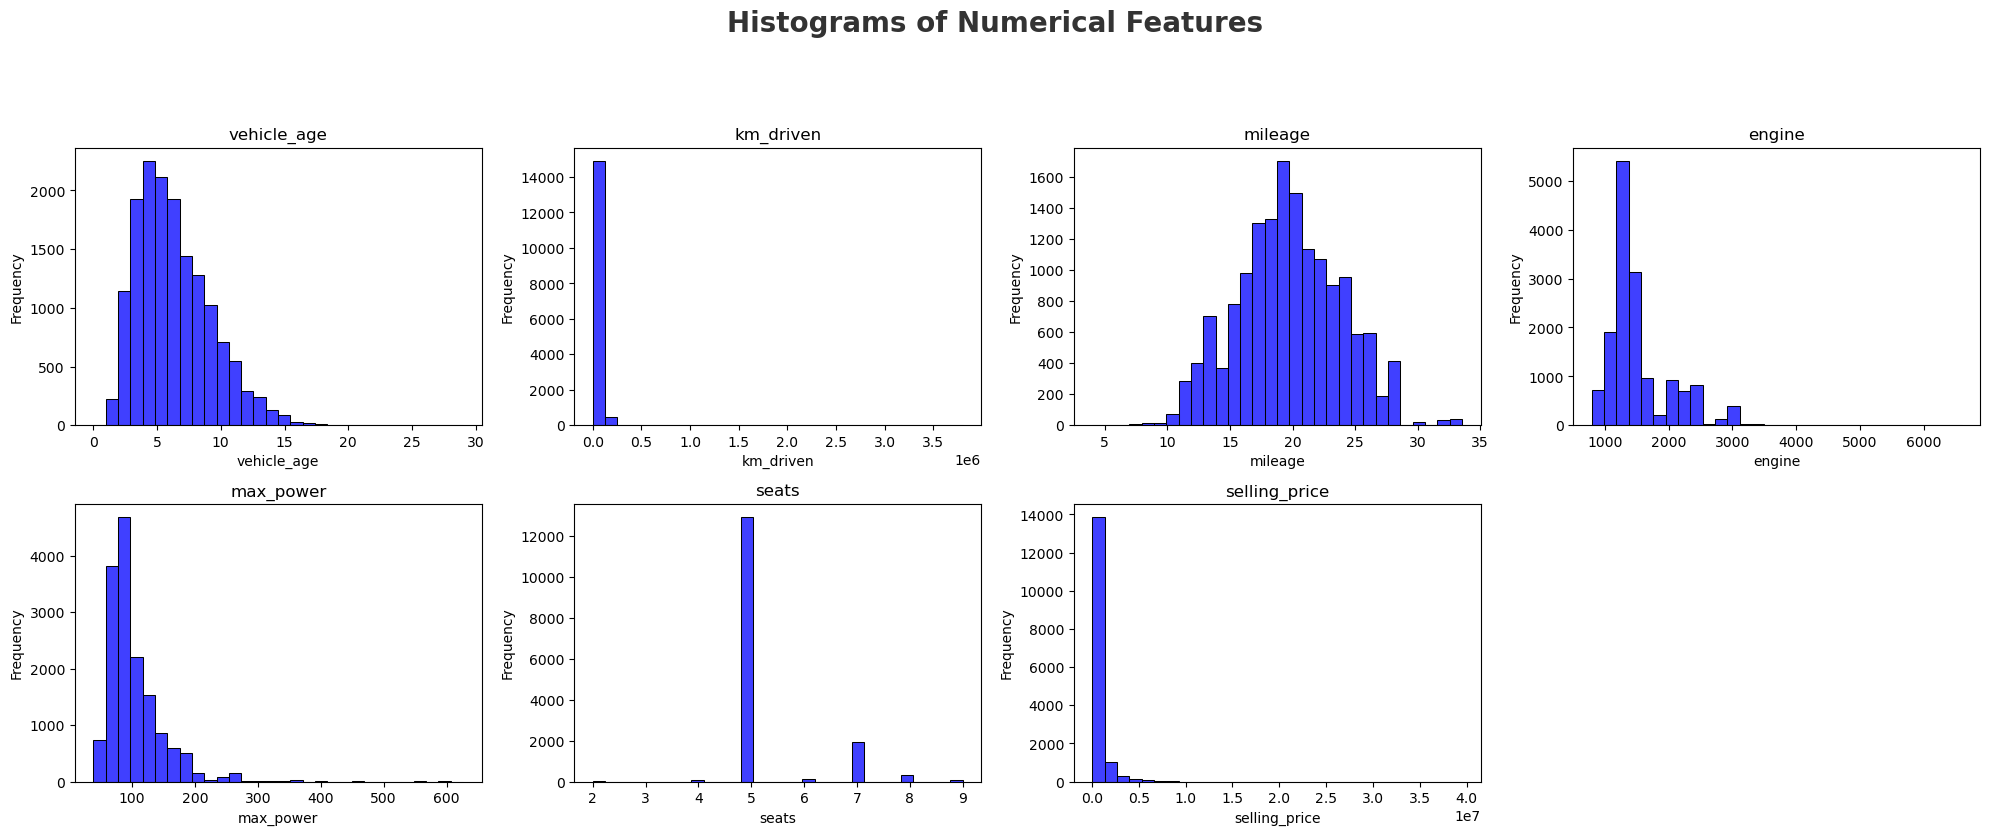

In [31]:

# Plot histograms for numerical features
plt.figure(figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i, col in enumerate(num_df.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], bins=30, color='b')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [32]:
skewness = num_df.skew()
print(skewness)

vehicle_age       0.833712
km_driven        28.172711
mileage           0.104961
engine            1.666467
max_power         2.485129
seats             2.039983
selling_price    10.047048
dtype: float64


#### Vehicle Age:
* Moderately positively skewed
* Most vehicles are between 0-10 years old
* Few vehicles are over 20 years old
#### KM Driven:
* Highly positively skewed (long right tail)
* Most cars have driven between 0-100,000 km
* Few extreme values up to 3,800,000 km
#### Mileage:
* Approximately symmetric distribution
* Most vehicles have mileage between 15-25
* Centered around 19.7
#### Engine:
* Highly positively skewed
* Most engines are between 1000-2000 cc
* Few high-powered engines above 3000 cc
#### Max Power:
* Highly positively skewed
* Most cars have power between 50-150
* Few high-performance vehicles with power > 300
#### Seats:
* Highly positively skewed
* Most cars have 5 seats
* Few vehicles with 7-9 seats
#### Selling Price:
* Highly positively skewed (very long right tail)
* Most cars priced between 100,000-1,000,000
* Few luxury vehicles with very high prices
#### Key Patterns:

*Most numerical features show positive skewness*

*Price, km_driven, and max_power show the most extreme skewness*

*Only mileage shows a relatively normal distribution*

*Seats show a discrete distribution as expected*

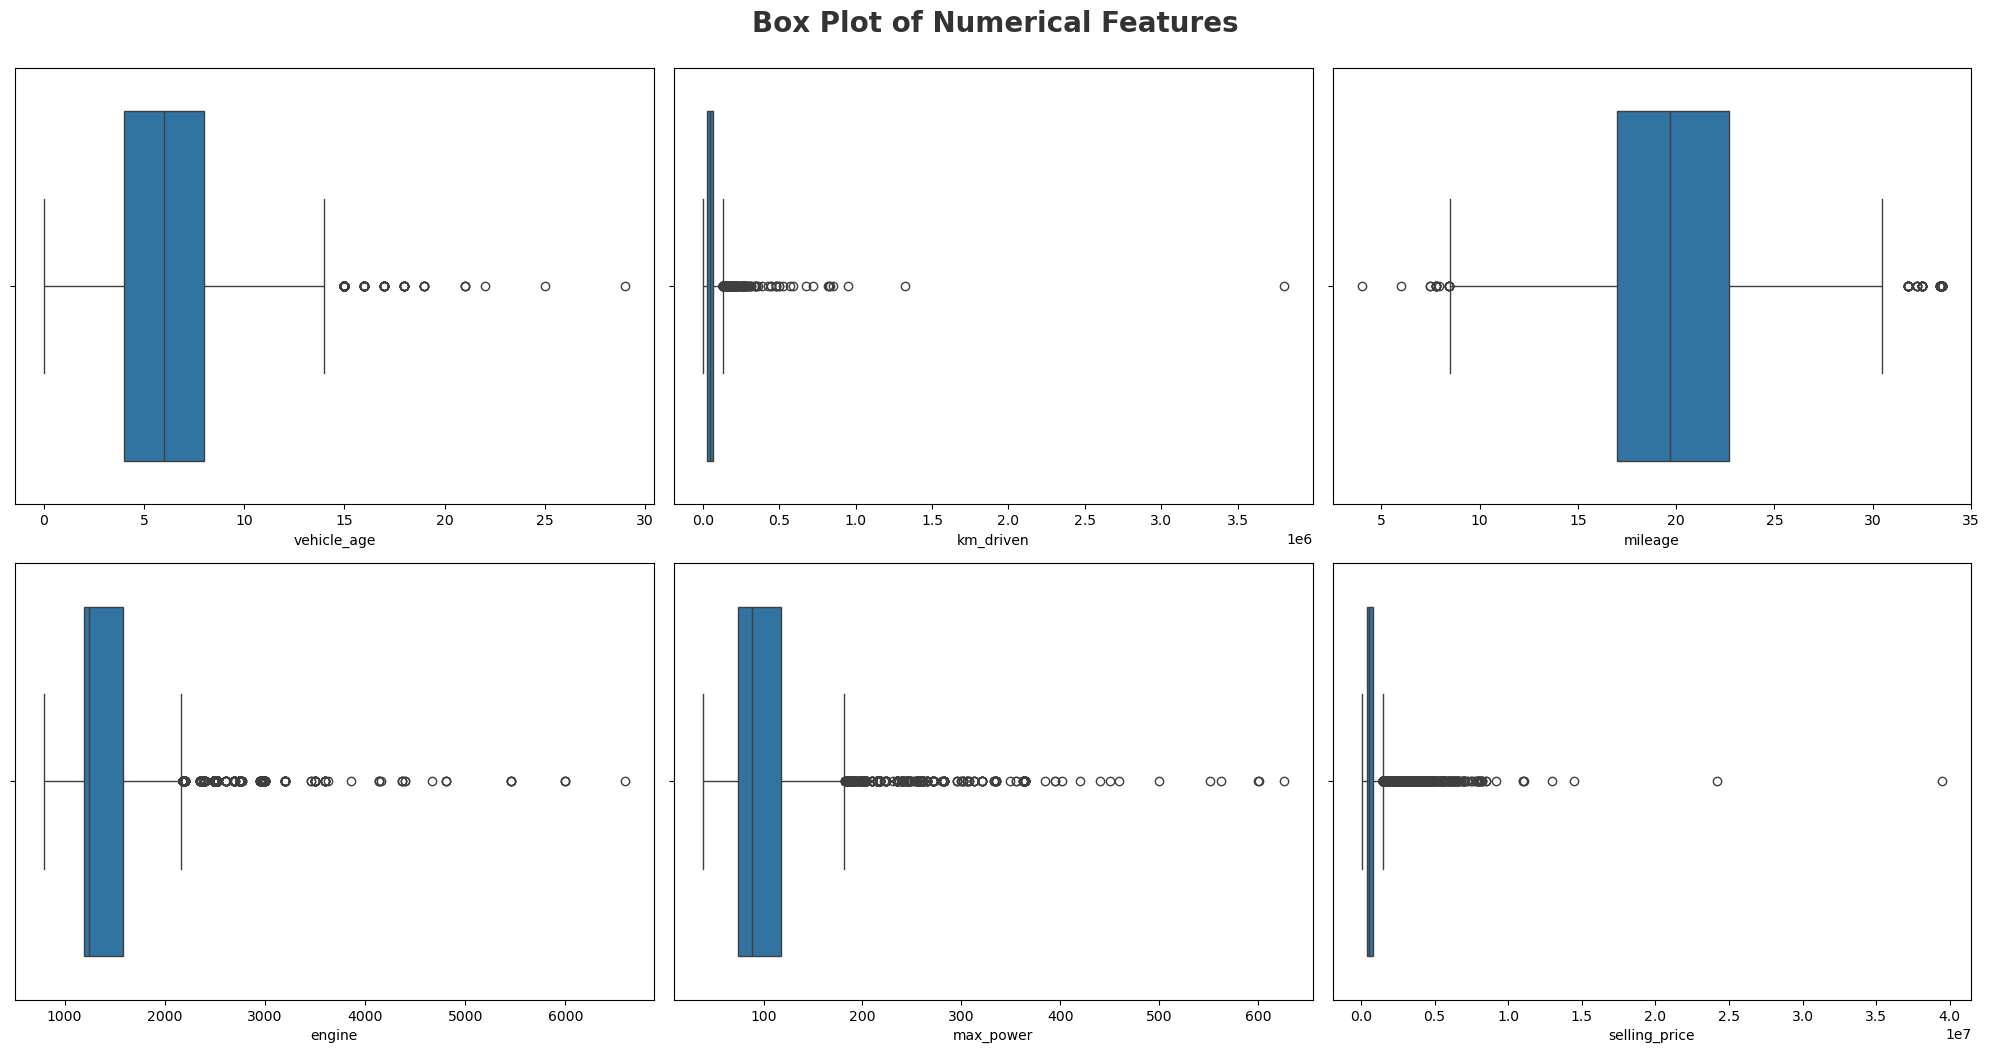

In [34]:
# Exclude the 'seats' column
num_df_filtered = num_df.drop(columns=['seats'])

plt.figure(figsize=(20, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(num_df_filtered.columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[num_df_filtered.columns[i]])
    plt.xlabel(num_df_filtered.columns[i])
    plt.tight_layout()

plt.show()


Outliers in km_driven, enginer, selling_price, and max power.

Categorical Features

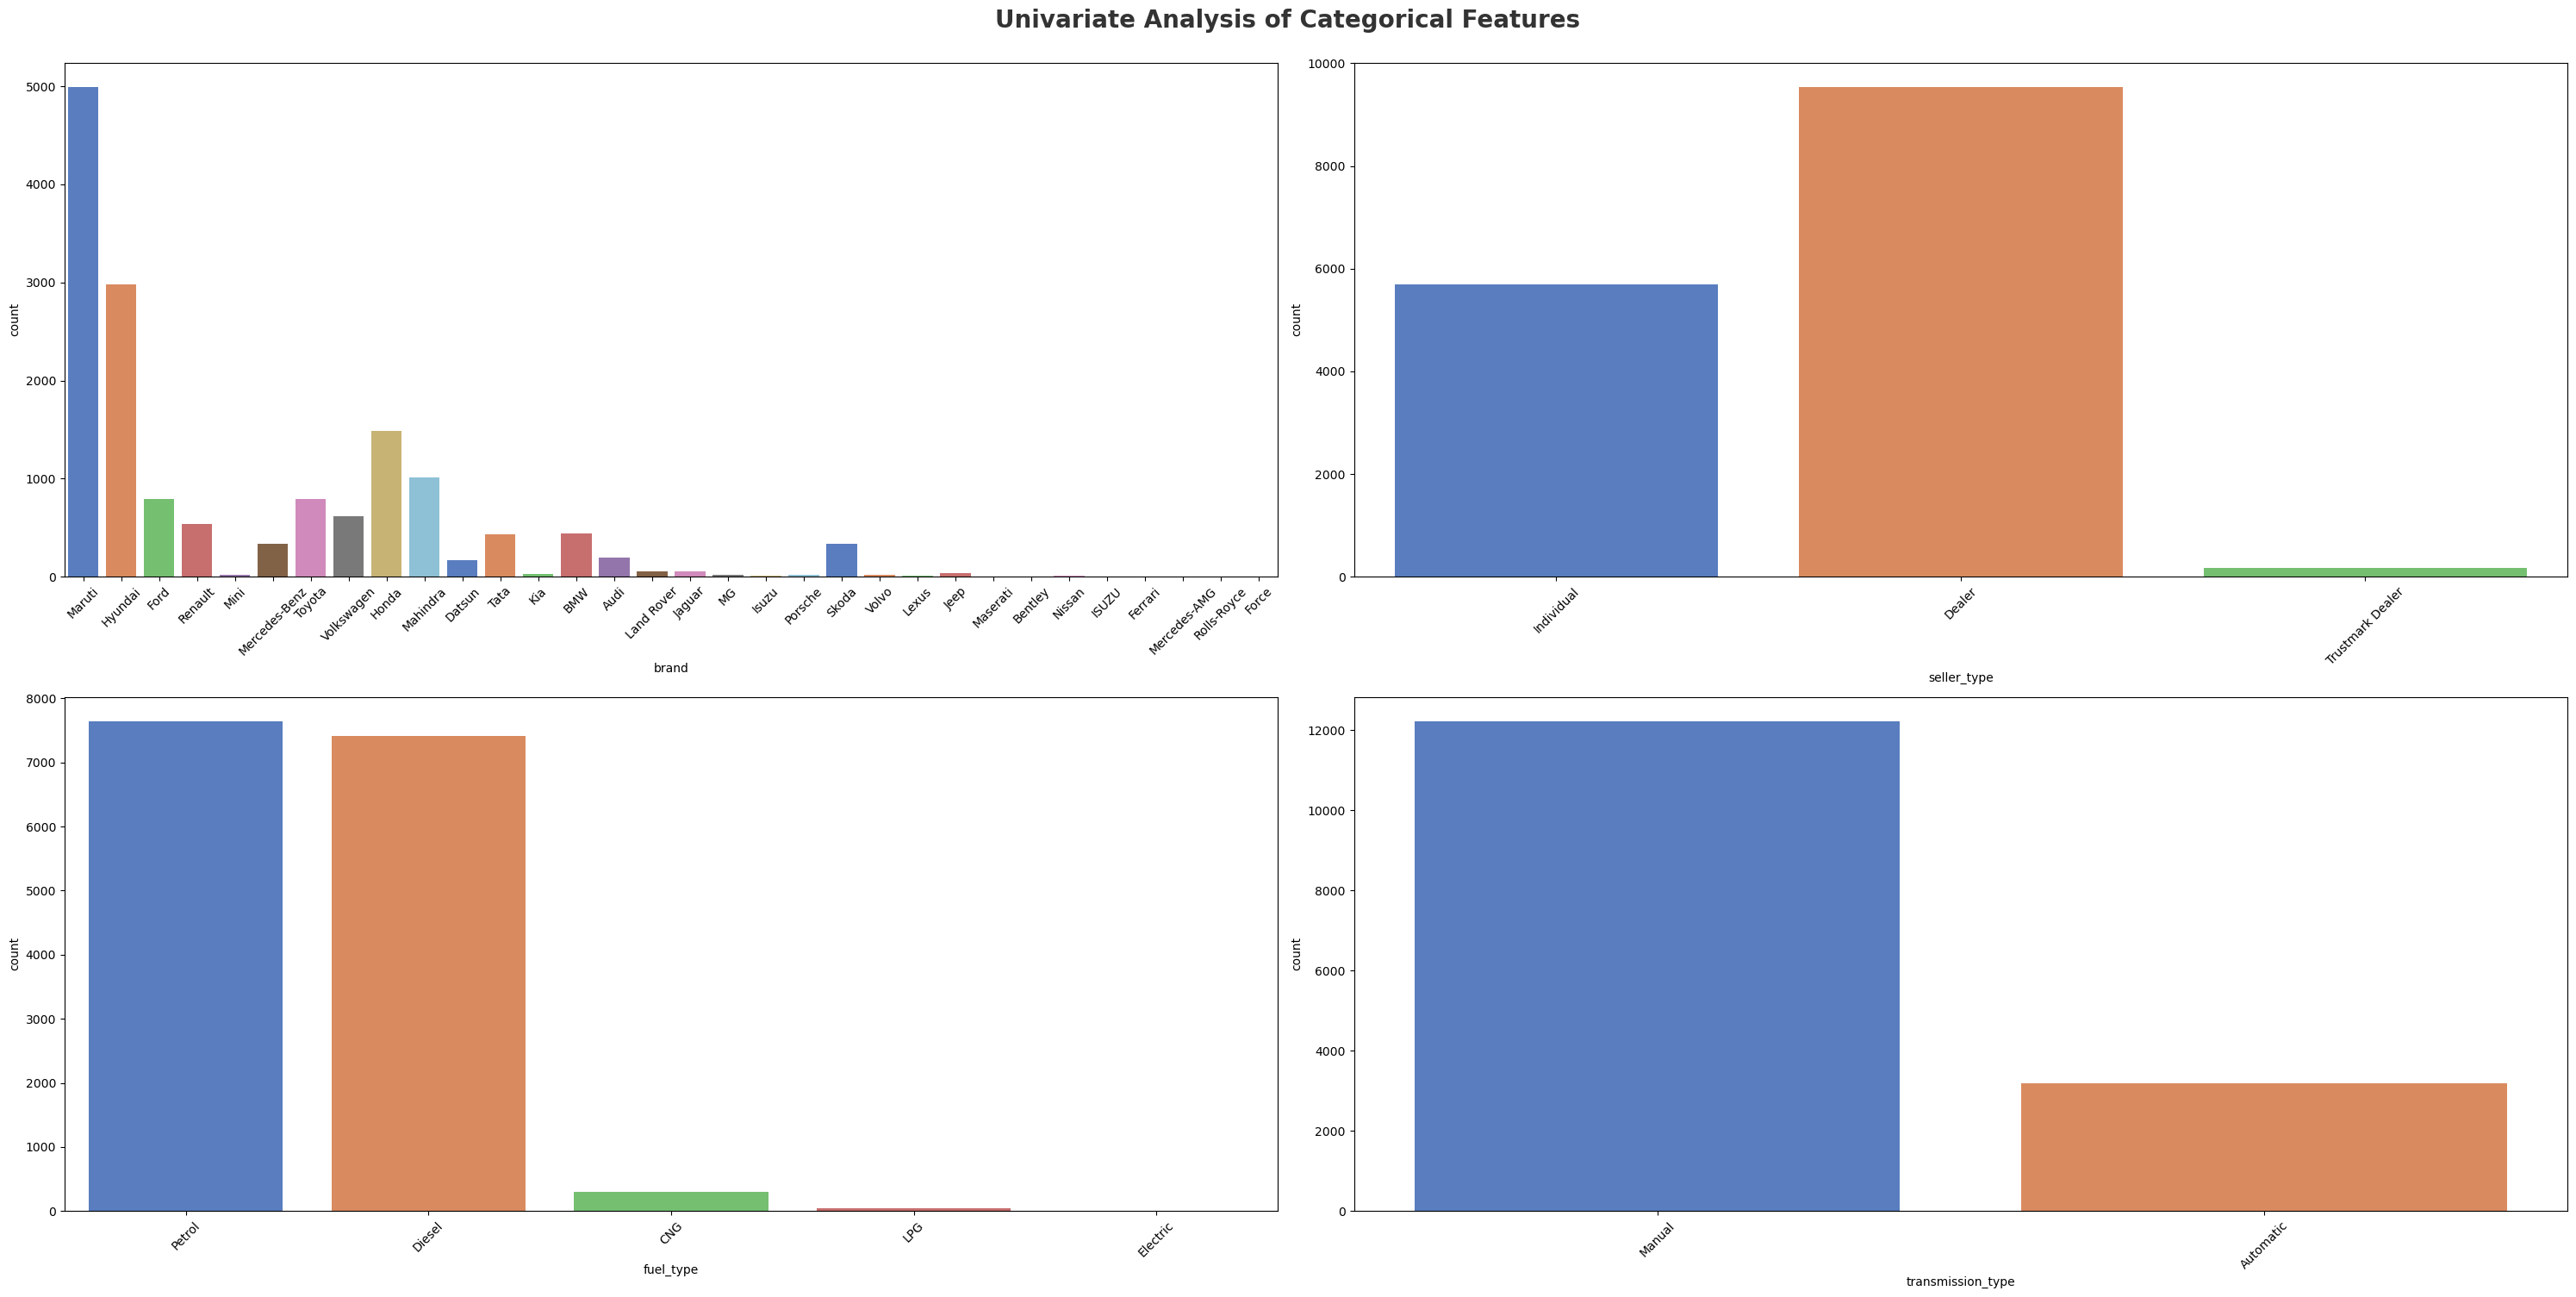

In [37]:
plt.figure(figsize=(30,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20,fontweight='bold', alpha=0.8, y=1.0)
cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]], palette= 'muted')
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

#### Listing out Top 10 vehicles that dominate CarDekho's sales charts

In [39]:
df.car_name.value_counts().head(10)

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

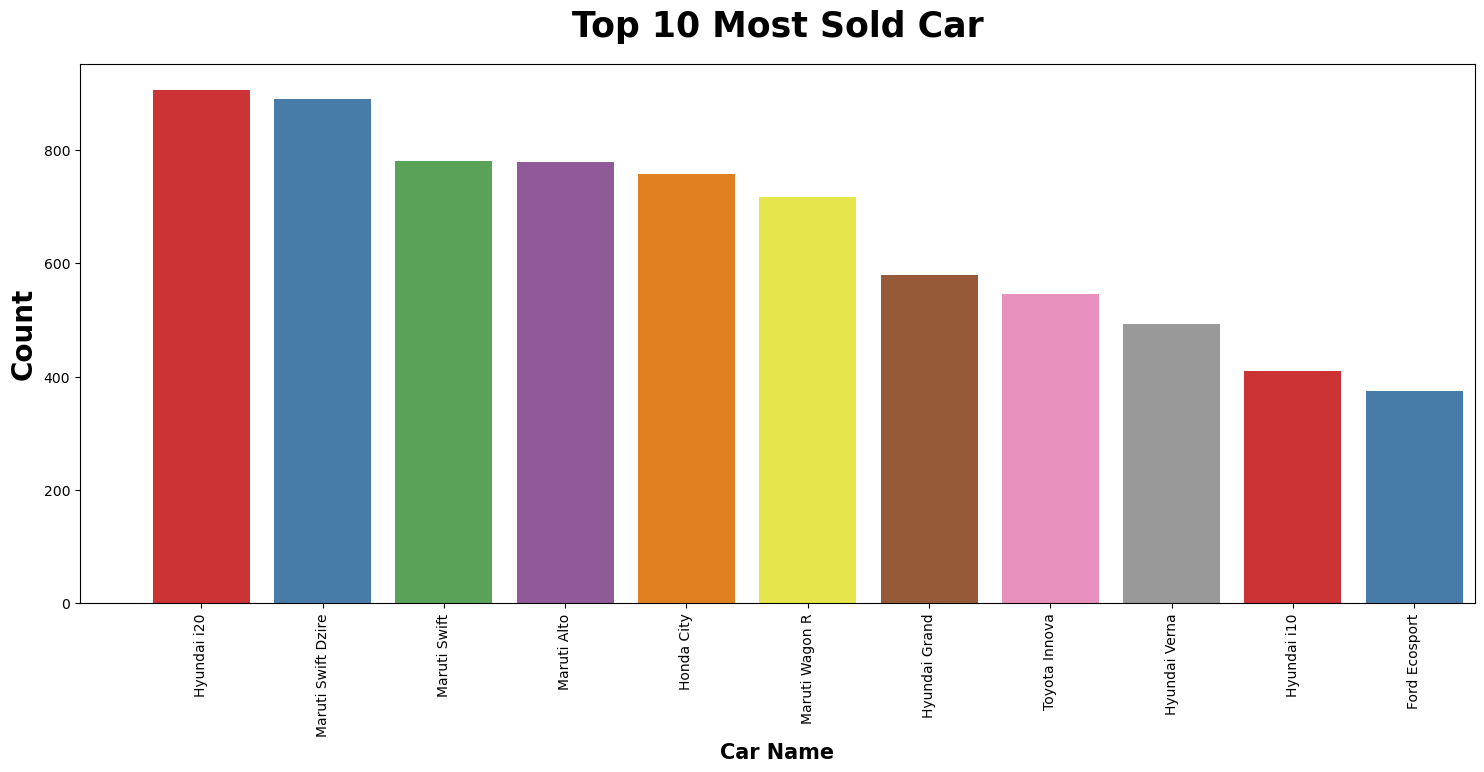

In [40]:
plt.subplots(figsize=(18,7))
sns.countplot(x='car_name',palette="Set1", data=df,order=df['car_name'].value_counts().index)
#value_counts().index: order the bars based on the count of occurrences of each car name
plt.title("Top 10 Most Sold Car", weight = 'bold', fontsize=25,pad=20)
plt.ylabel('Count',weight='bold',fontsize=20)
plt.xlabel('Car Name',weight='bold',fontsize=15)
plt.xticks(rotation=90)
plt.xlim(-1,10.5)
plt.show()

Check mean price of Hyundai i20 which is most sold

In [42]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of  Hyundai i20 is {i20:.2f} Rupees')

The mean price of  Hyundai i20 is 543603.75 Rupees


**Inference**
- As per the Chart these are top 10 most selling cars in used car website.
- Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.
- Mean Price of Most Sold Car is 5.4 lakhs.
- This Feature has impact on the Target Variable.

## Top 10 car brands that experience the highest sales on CarDekho

In [45]:
df.brand.value_counts().head(10)

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

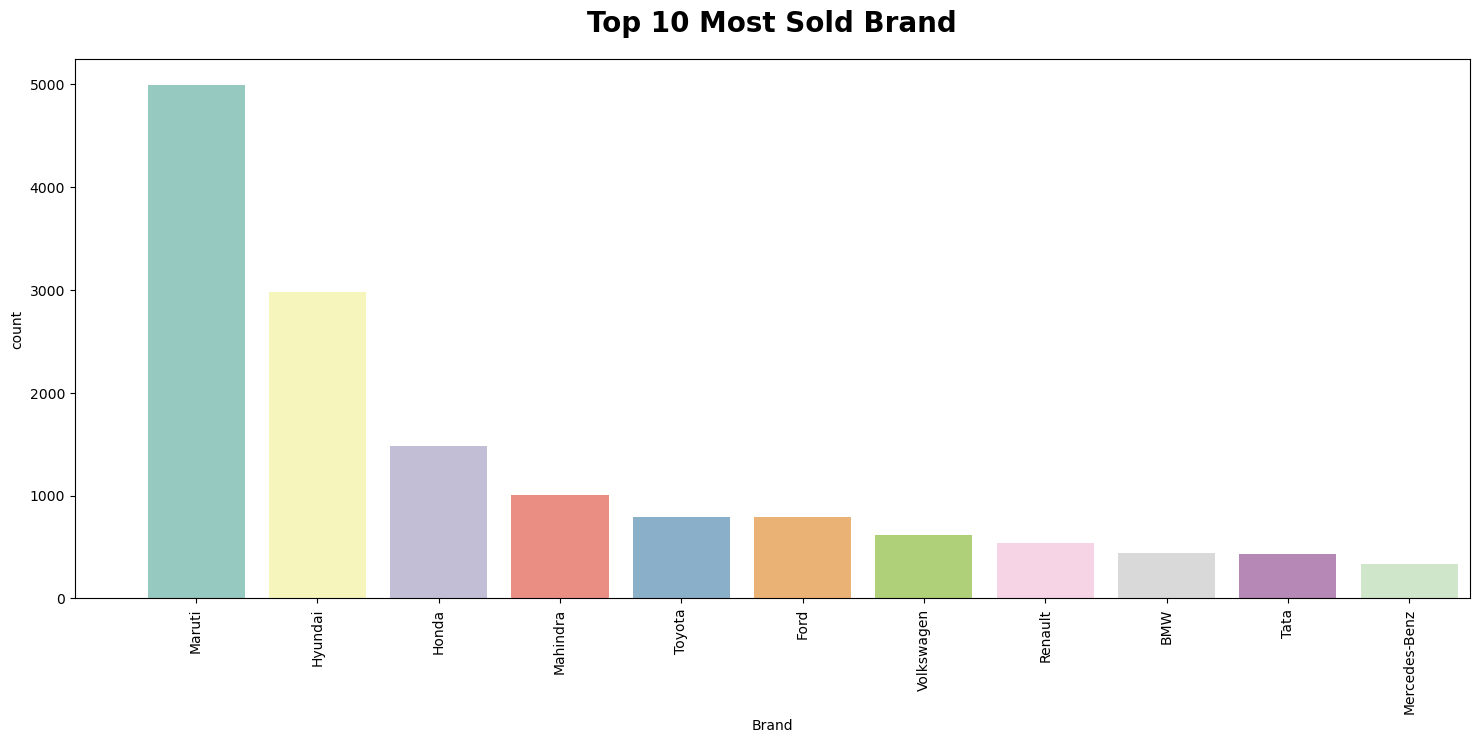

In [46]:
plt.subplots(figsize=(18,7))
sns.countplot(x='brand', data=df,palette="Set3", order = df['brand'].value_counts().index)
plt.title('Top 10 Most Sold Brand', weight='bold',fontsize=20,pad=20)
plt.ylabel('count')
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.xlim(-1,10.5)
plt.show()


Outcome - Maruti is most seliing brand on cardekho

Check the Mean price of Maruti brand which is most sold

In [48]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} rupees')

The mean price of Maruti is 487089.32 rupees


**Inference**
* As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.
* Following Maruti we have Hyundai and Honda.
* Mean Price of Maruti Brand is 4.8 lakhs.

### Bivariate Analysis

In [51]:
continuous_features=[feature for feature in num_df if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


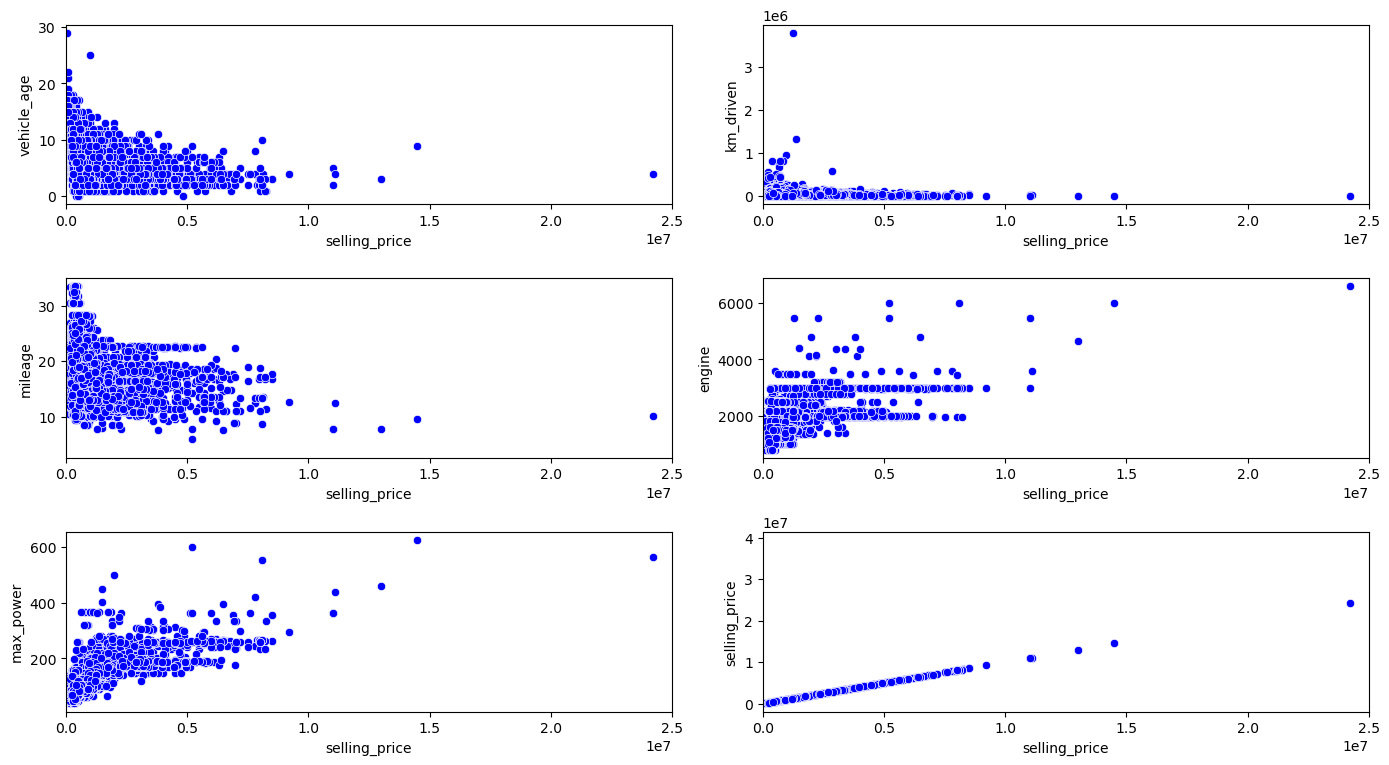

In [52]:
fig = plt.figure(figsize=(14, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    
plt.tight_layout()
plt.show()

**Inference**
* Lower Vehicle age has more selling price than Vehicle with more age.
* Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.
* Kms Driven has negative effect on selling price

### Costlier Brand on CarDekho Website

In [55]:
brand = df.groupby('brand').selling_price.max()
brand = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
print('-'*50)
print('Top 10 Costlier Brands on CarDekho Website')
print('-'*50)
brand

--------------------------------------------------
Top 10 Costlier Brands on CarDekho Website
--------------------------------------------------


,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


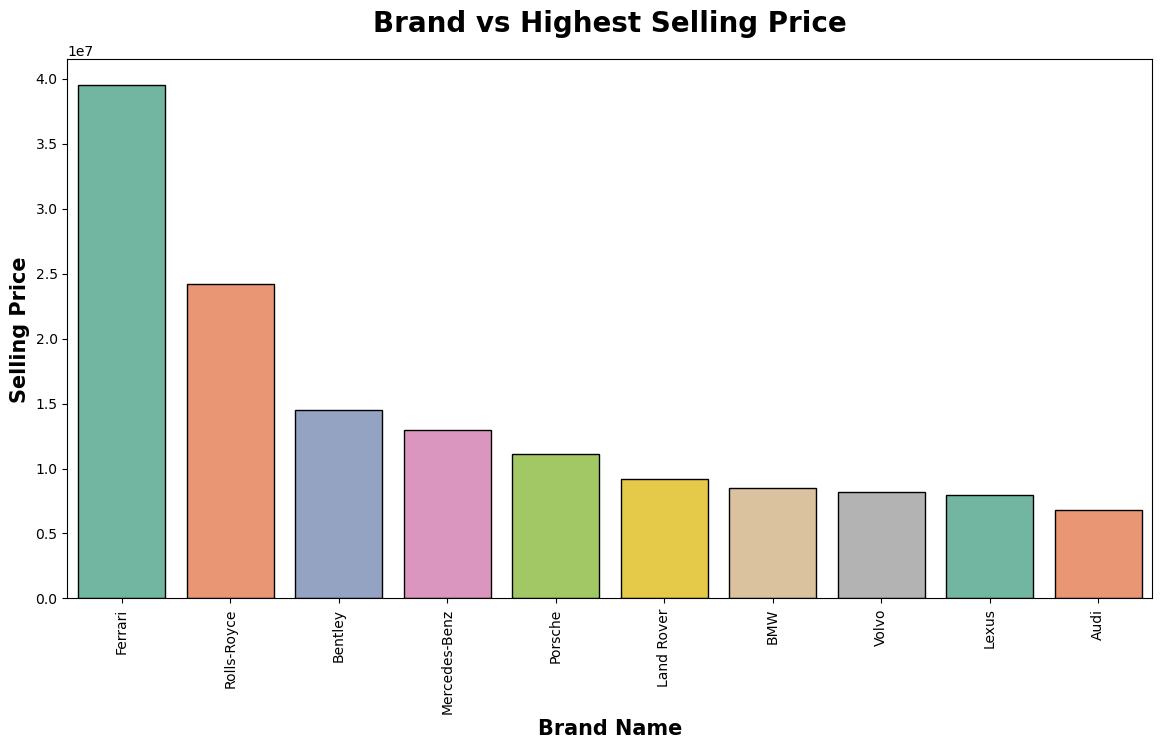

In [56]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y =brand.selling_price, ec='black',palette='Set2')
plt.title('Brand vs Highest Selling Price',weight='bold',fontsize=20,pad=20)
plt.xlabel('Brand Name',weight='bold',fontsize=15)
plt.ylabel('Selling Price', weight='bold', fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Inference**
* Costliest Brand sold is Ferrari at 3.95 Crores.
* Second most car Brand is Rolls-Royce as 2.42 Crores.
* Brand name has very clear impact on selling price

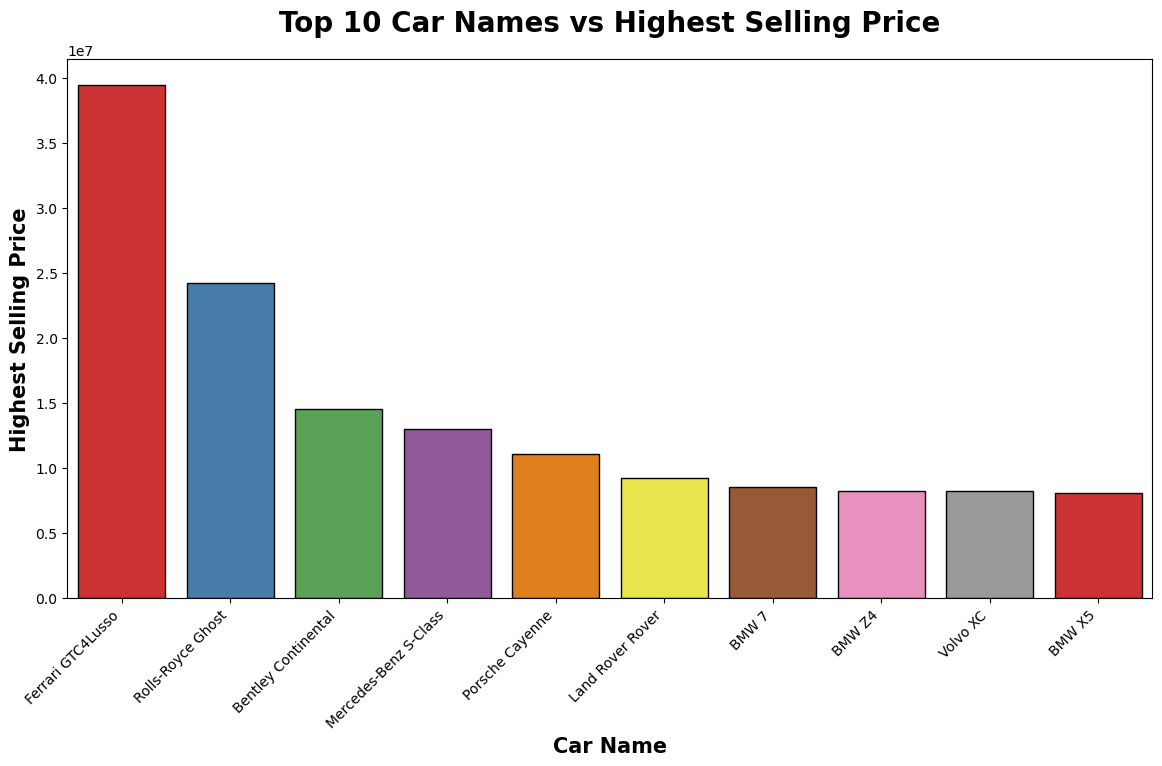

In [58]:

# Group by car name to get the highest selling price and sort the results
top_cars = df.groupby('car_name')['selling_price'].max().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x=top_cars.index, y=top_cars.values, palette='Set1', edgecolor='black')
plt.title('Top 10 Car Names vs Highest Selling Price', weight='bold', fontsize=20, pad=20)
plt.xlabel('Car Name', weight='bold', fontsize=15)
plt.ylabel('Highest Selling Price', weight='bold', fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotate for better readability

plt.show()


**Inference**
- Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
- Ferrari selling price is 3.95 Crs.
- Other than Ferrari other car has priced below 1.5cr.

#### Most Mileage Car Brand on CarDekho Website

In [61]:
mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)

print('-'*50)
print('Most Mileage Car Brand on CarDekho Website')
print('-'*50)
mileage.to_frame()

--------------------------------------------------
Most Mileage Car Brand on CarDekho Website
--------------------------------------------------


,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


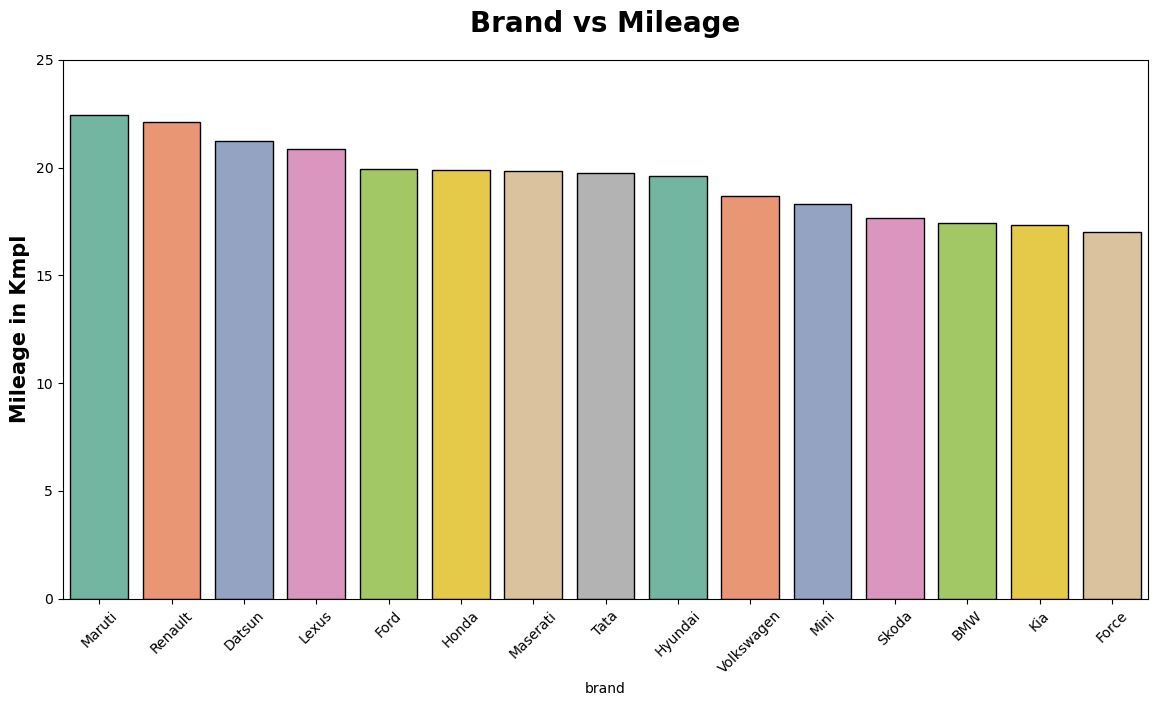

In [62]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index,y=mileage.values,ec='black',palette='Set2')
plt.title('Brand vs Mileage', weight='bold',fontsize=20,pad=20)
plt.ylabel('Mileage in Kmpl', weight='bold',fontsize=15)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

#### Most Mileage Car on CarDekho Website

In [64]:
mileage_car = df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)

print('-'*50)
print('Most Mileage Car on CarDekho Website')
print('-'*50)

mileage_car.to_frame()

--------------------------------------------------
Most Mileage Car on CarDekho Website
--------------------------------------------------


,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


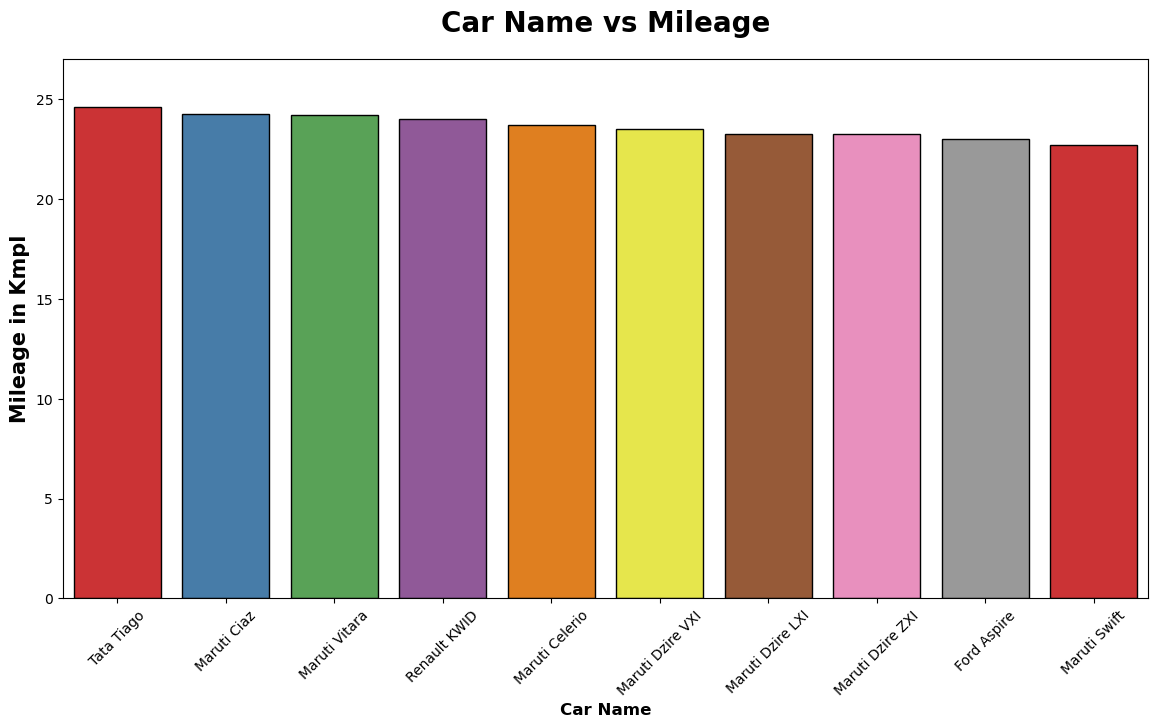

In [65]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage_car.index, y=mileage_car.values, ec='black',palette='Set1')
plt.title('Car Name vs Mileage', weight='bold',fontsize=20,pad=20)
plt.ylabel('Mileage in Kmpl',weight='bold',fontsize=15)
plt.xlabel('Car Name',weight='bold',fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

#### Kilometers Driven Vs Selling Price

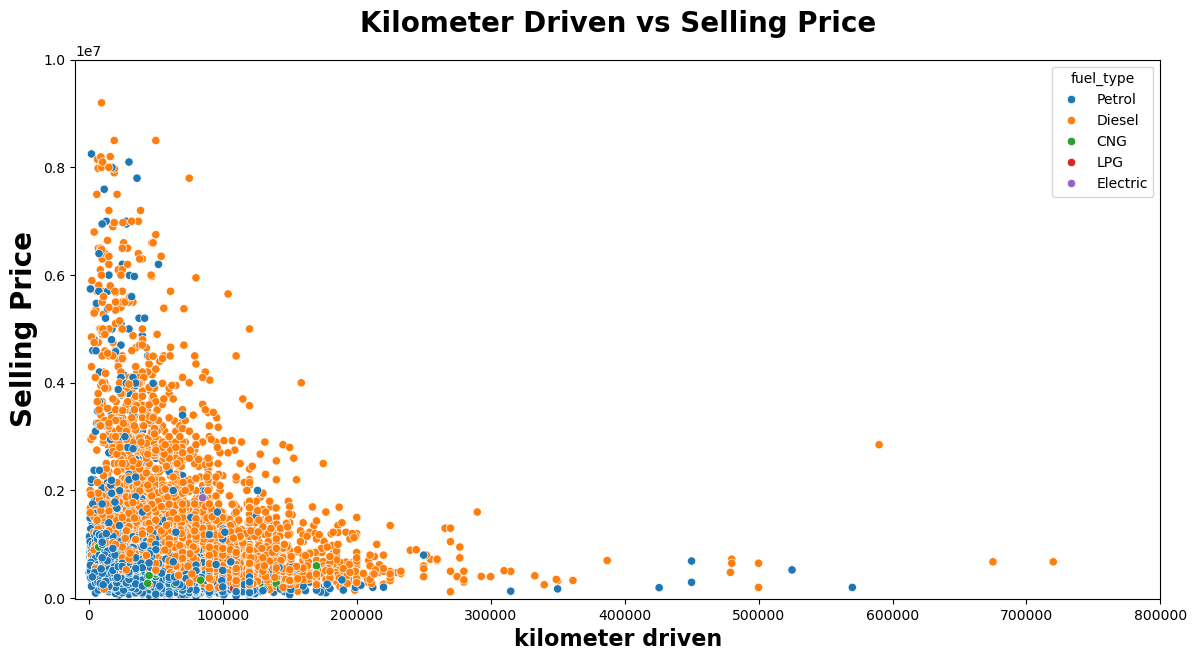

In [67]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x='km_driven',y='selling_price',data=df,ec='white',color='b',hue='fuel_type')
plt.title('Kilometer Driven vs Selling Price',weight='bold',fontsize=20,pad=20)
plt.ylabel('Selling Price',weight='bold',fontsize=20)
plt.xlim(-10000,800000)#used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel('kilometer driven',weight='bold',fontsize=16)
plt.show()

**Inference**
* Many Cars were sold with kms between 0 to 20k Kilometers
* Low Kms driven cars had more selling price compared to cars which had more kms driven.

#### Fuel Type Vs Selling Price

In [70]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


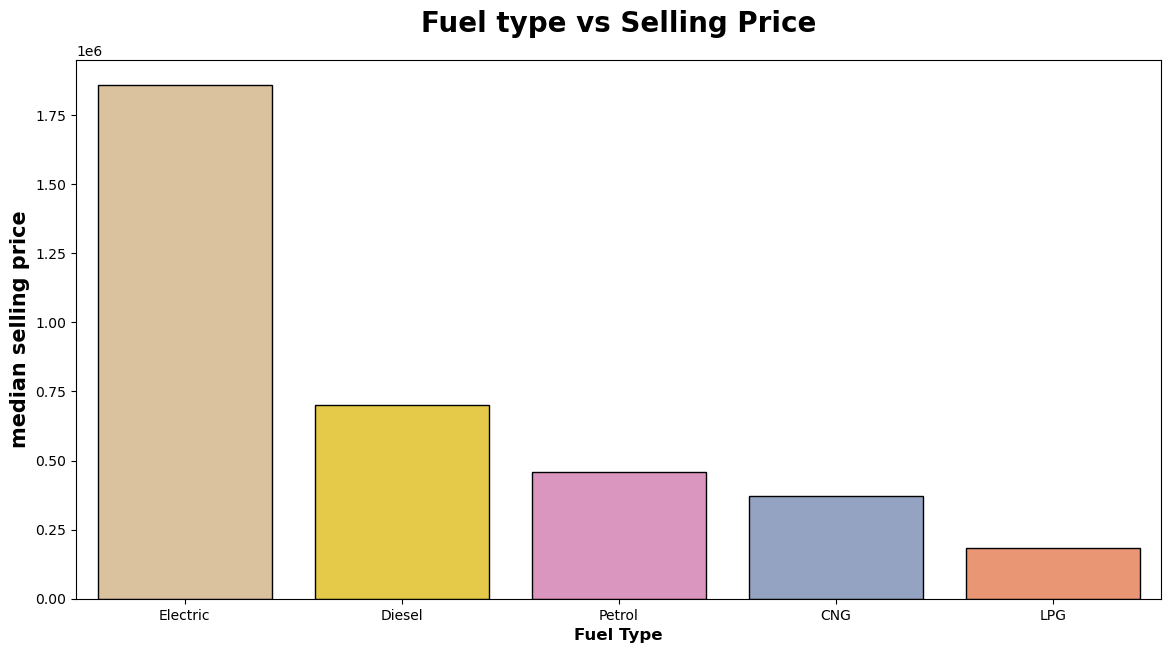

In [71]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel.index,y=fuel.values,ec='black',palette='Set2_r')
plt.title('Fuel type vs Selling Price',weight='bold',fontsize=20,pad=20)
plt.ylabel('median selling price',weight='bold',fontsize=15)
plt.xlabel('Fuel Type',weight='bold',fontsize=12)
plt.show()

**Inference**
* Electric cars have highers selling average price.
* Followed by Diesel and Petrol.
* Fuel Type is also important feature for the Target variable.

#### Fuel Type Vs Mileage

In [74]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


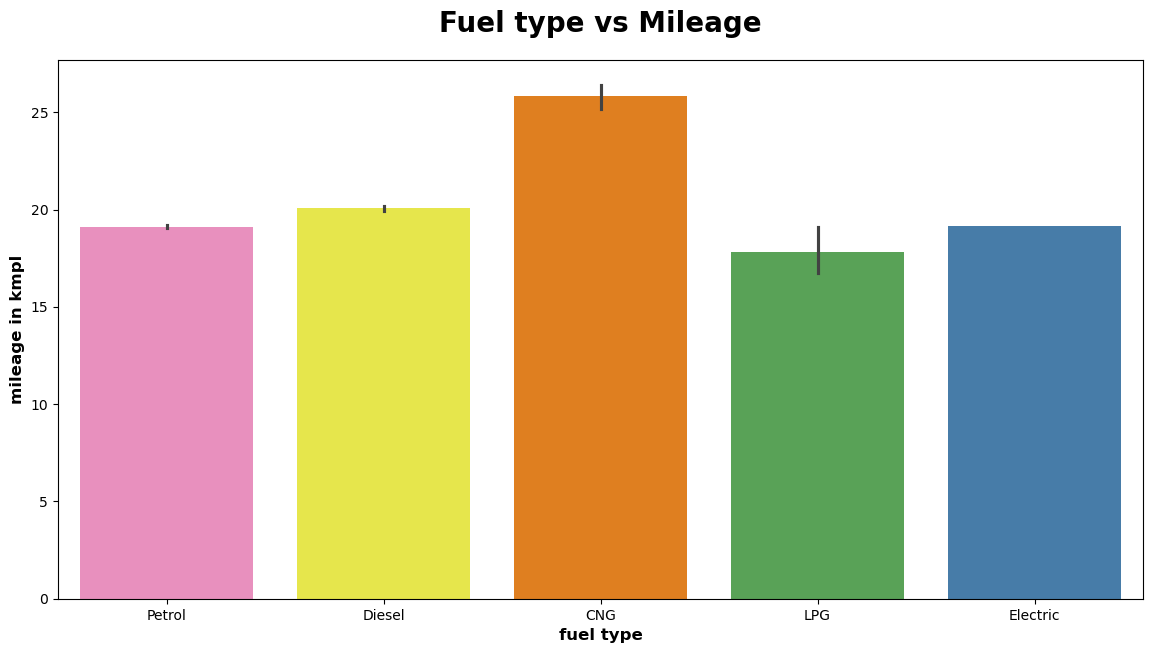

In [75]:
plt.subplots(figsize=(14,7))
sns.barplot(x='fuel_type',y='mileage',data=df,palette='Set1_r')
plt.title("Fuel type vs Mileage",weight='bold',fontsize=20,pad=20)
plt.ylabel('mileage in kmpl',weight='bold',fontsize=12)
plt.xlabel('fuel type',weight='bold',fontsize=12)
plt.show()

#### Mileage vs Selling Price

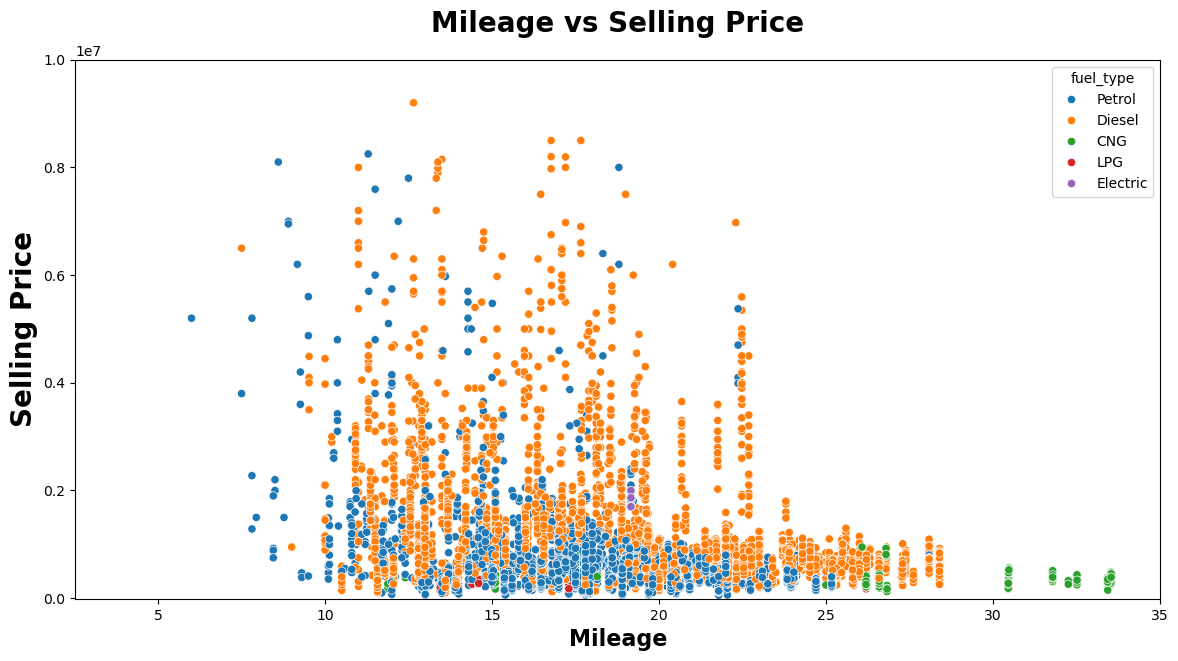

In [89]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

#### Vehicle Age vs Selling Price

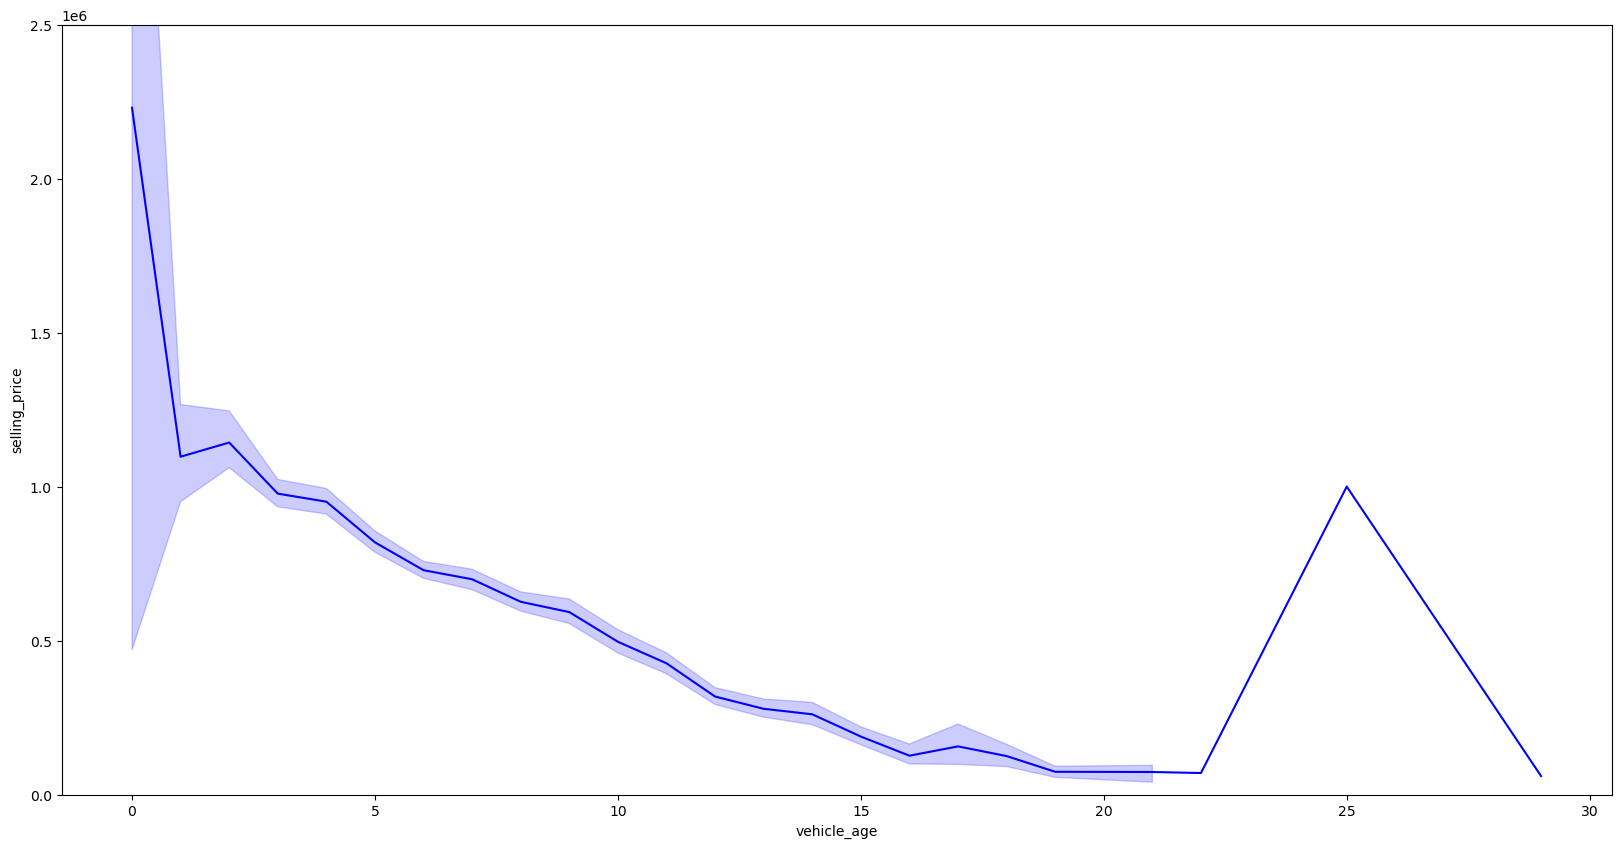

In [91]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

**Inference**
* As the Vehicle age increases the price also get reduced.
* Vehicle age has Negative impact on selling price

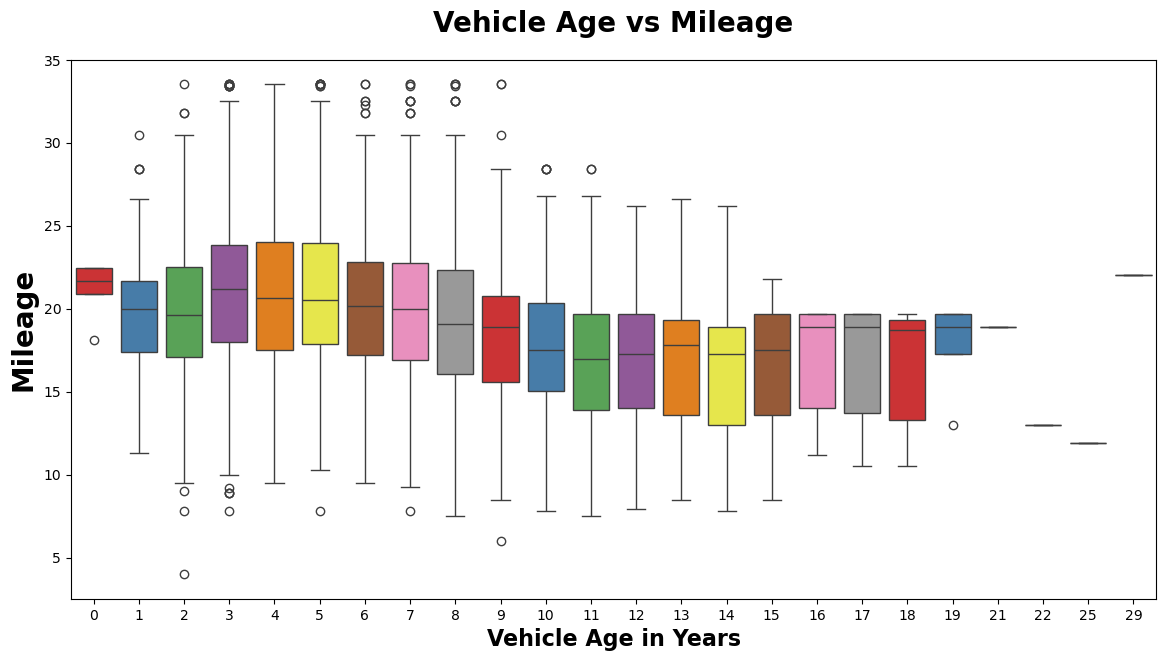

In [93]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df.vehicle_age, y= df.mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

**Inference**
* As the Age of vehicle increases the median of mileage drops.
* Newer Vehicles have more mileage median older vehicle.

In [95]:
oldest = df.groupby('car_name')['vehicle_age'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
Mahindra Scorpio,18
Skoda Octavia,18
Honda CR-V,17
Mercedes-Benz E-Class,17


**Inference**
* Maruti Alto is the Oldest car available 29 years old in the used car website followed  by BMW 3 for 25 years old.

#### Transmission Type Vs Selling Price

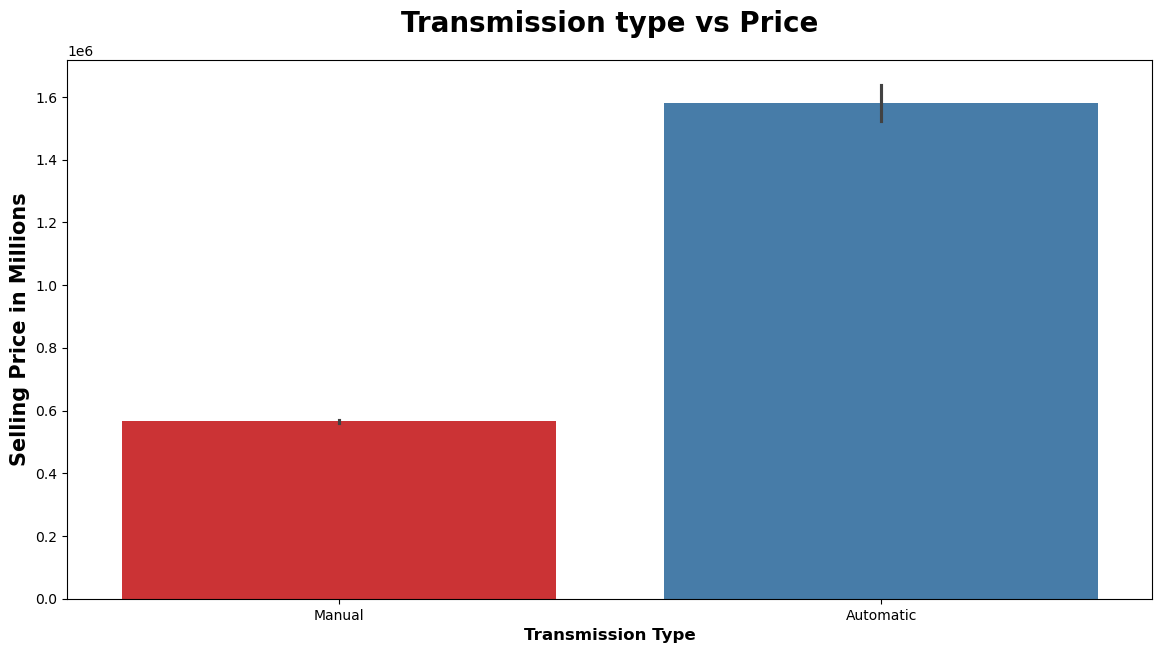

In [98]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type',y='selling_price',data=df,palette='Set1')
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

**Inference**
* Manual Transmission was found in most of the cars which was sold.
* Automatic cars have more selling price than manual cars.

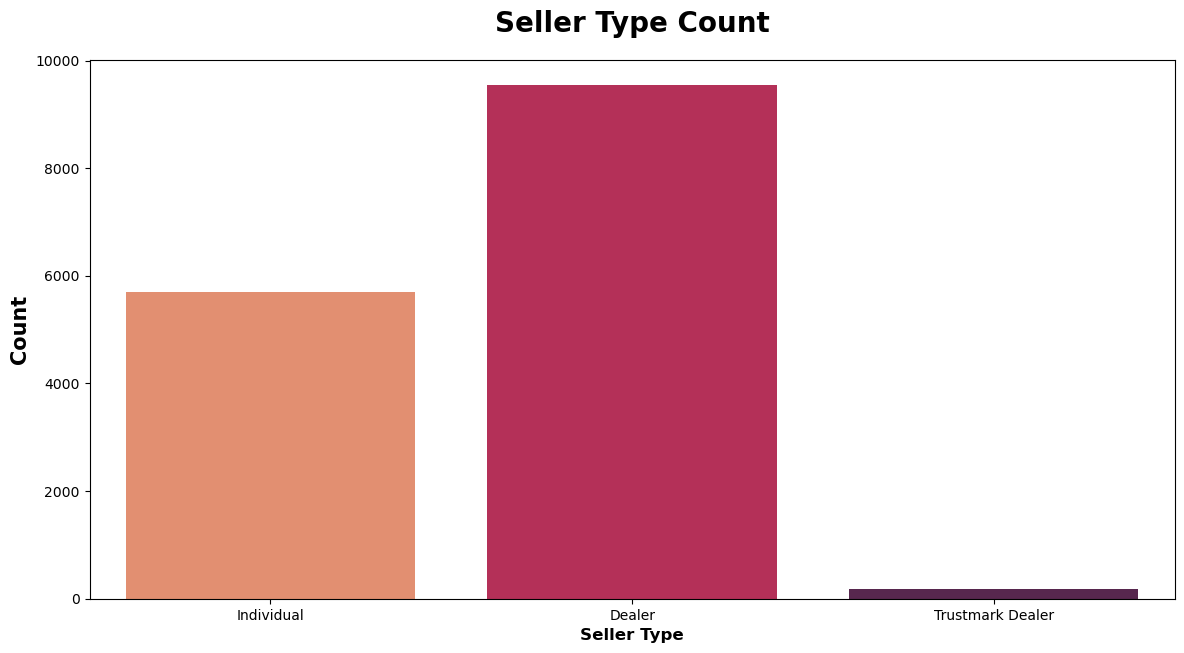

In [107]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("Seller Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show() 

#### Seller Type vs Selling Price

In [109]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


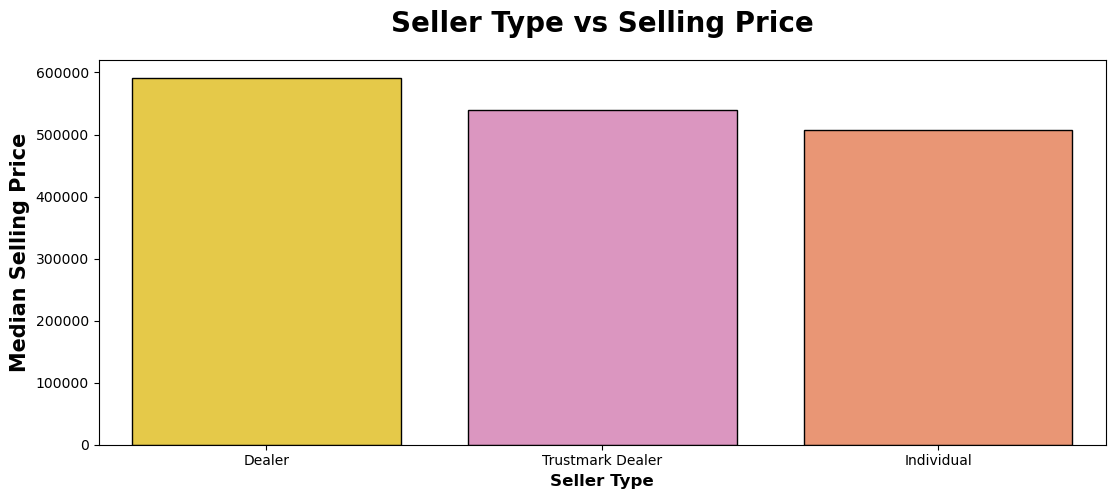

In [110]:
plt.subplots(figsize=(13,5))
sns.barplot(x=dealer.index, y=dealer.values, ec = "black", palette="Set2_r")
plt.title("Seller Type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show()

**Inference**
* Dealers have put more ads on used car website.
* Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
* Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.
* Dealers have more median selling price than Individual.

#### Multivariate Analysis

In [113]:
df[num_df.columns].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.031938,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192897,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.442200,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.552778,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172812,0.750236
seats,0.031938,0.192897,-0.442200,0.552778,0.172812,1.000000,0.115231
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115231,1.000000


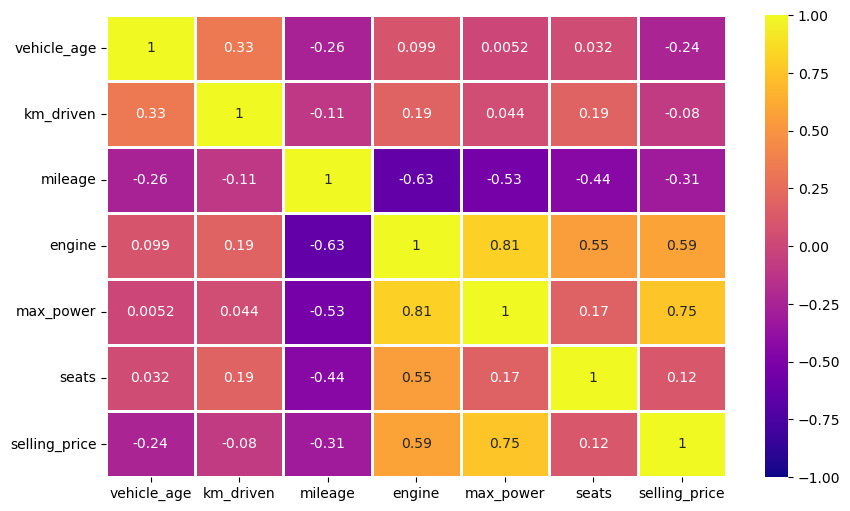

In [114]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df[num_df.columns].corr(),annot=True,cmap='plasma',vmin=-1,vmax=1,linecolor='white',linewidths=2)
plt.show()

**Inference**
* Max Power and Engine are highly correlated

## Final Report
* The datatypes and Column names were right and there was 15411 rows and 13 columns
* The selling_price column is the target to predict. i.e Regression Problem.
* There are outliers in the km_driven, enginer, selling_price, and max power.
* Dealers are the highest sellers of the used cars.
* Skewness is found in few of the columns will check it after handling outliers.
* Vehicle age has negative impact on the price.
* Manual cars are mostly sold and automatic has higher selling average than manual cars.
* Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
* We just need less data cleaning for this dataset.

# Feature Engineering

In [118]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


#### Removing unnecessary features
**Dropping car_name ,brand and model**

These features are not directly correlated with the price of car and they can actually introduce noise into the model. For example, two cars with the same features but different brands may have different prices. This is because brand reputation and perceived quality can play a role in determining the price of a car. By dropping the car_name ,brand and model, we can create a model that is more accurate and reliable.

In [123]:
# Creating copy of  original dataframe

df_model=df.copy()

df_model

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [124]:
df_model.drop(labels=['car_name','brand','model'],axis=1,inplace=True)

df_model

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...
19537,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


#### Converting Categorical Columns into numerical
Using **One Hot Encoding** to convert categorical variables to numerical

In [127]:
df_model

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...
19537,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [128]:
df_model.columns

Index(['vehicle_age', 'km_driven', 'seller_type', 'fuel_type',
       'transmission_type', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

In [167]:
catagorical_cols = ['seller_type',
       'fuel_type', 'transmission_type']

categorical_cols_encoded = pd.get_dummies(df_model[catagorical_cols],dtype=int) 
categorical_cols_encoded


,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,0,1,0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,1,0,1
3,0,1,0,0,0,0,0,1,0,1
4,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
19537,1,0,0,0,0,0,0,1,0,1
19540,1,0,0,0,0,0,0,1,0,1
19541,1,0,0,0,1,0,0,0,0,1
19542,1,0,0,0,1,0,0,0,0,1


In [169]:
import pickle
with open('encoded_features.pkl', 'wb') as f:
    pickle.dump(categorical_cols_encoded, f)

print("\nEncoded features have been pickled.")


Encoded features have been pickled.


In [194]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_cols = ['seller_type', 'fuel_type', 'transmission_type']
numerical_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_features = one_hot_encoder.fit_transform(df[categorical_cols])
feature_names = one_hot_encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

df_model = pd.concat([df[numerical_cols].reset_index(drop=True), encoded_df], axis=1)
print(df_model.head())


   vehicle_age  km_driven  mileage  engine  max_power  seats  selling_price  \
0            9     120000    19.70     796      46.30      5         120000   
1            5      20000    18.90    1197      82.00      5         550000   
2           11      60000    17.00    1197      80.00      5         215000   
3            9      37000    20.92     998      67.10      5         226000   
4            6      30000    22.77    1498      98.59      5         570000   

   seller_type_Dealer  seller_type_Individual  seller_type_Trustmark Dealer  \
0                 0.0                     1.0                           0.0   
1                 0.0                     1.0                           0.0   
2                 0.0                     1.0                           0.0   
3                 0.0                     1.0                           0.0   
4                 1.0                     0.0                           0.0   

   fuel_type_CNG  fuel_type_Diesel  fuel_type_Elec

In [196]:
df_model.to_pickle('encoded_df_model.pkl')
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(one_hot_encoder, f)

print("DataFrame and encoder have been pickled successfully.")

DataFrame and encoder have been pickled successfully.


In [198]:
df_model.columns

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'fuel_type_CNG', 'fuel_type_Diesel',
       'fuel_type_Electric', 'fuel_type_LPG', 'fuel_type_Petrol',
       'transmission_type_Automatic', 'transmission_type_Manual'],
      dtype='object')

In [200]:
df_model.dtypes

vehicle_age                       int64
km_driven                         int64
mileage                         float64
engine                            int64
max_power                       float64
seats                             int64
selling_price                     int64
seller_type_Dealer              float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
fuel_type_CNG                   float64
fuel_type_Diesel                float64
fuel_type_Electric              float64
fuel_type_LPG                   float64
fuel_type_Petrol                float64
transmission_type_Automatic     float64
transmission_type_Manual        float64
dtype: object

### Creating Feature Matrix (Independent Variables) & Target Variable (Dependent Variable)

In [203]:
X = df_model.drop('selling_price',axis=1)
X

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [205]:
y =df_model['selling_price']
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64

# Model Building & Evaluation
Train-Test Split

In [208]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [210]:
X_train.shape

(12328, 16)

In [212]:
X_test.shape

(3083, 16)

In [214]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 554159.0109
- Mean Absolute Error: 266833.5393
- R2 Score: 0.6214
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502102.2421
- Mean Absolute Error: 278346.9698
- R2 Score: 0.6651


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 20936.1153
- Mean Absolute Error: 5254.6831
- R2 Score: 0.9995
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 318559.1278
- Mean Absolute Error: 129908.1441
- R2 Score: 0.8652


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 142124.5180
- Mean Absolute Error: 41366.2660
- R2 Score: 0.9751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 235974.6728
- Mean Absolute Error: 104731.9190
- R2 Score: 0.9260




In [216]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define the number of folds for K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through models and evaluate using K-fold cross-validation
for model_name, model in models.items():
    print(model_name)
    
    # Cross-validation scores (e.g., for R2)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    
    # Evaluate K-fold cross-validation performance
    model_cv_rmse = np.sqrt(-cv_scores.mean())
    
    print(f"K-Fold Cross-Validation Performance")
    print("- Root Mean Squared Error (CV): {:.4f}".format(model_cv_rmse))
    print("=" * 35)
    
    # Train the model and evaluate on the training and testing datasets
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('=' * 35)
    print('\n')


Linear Regression
K-Fold Cross-Validation Performance
- Root Mean Squared Error (CV): 558512.9641
Model performance for Training set
- Root Mean Squared Error: 554159.0109
- Mean Absolute Error: 266833.5393
- R2 Score: 0.6214
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502102.2421
- Mean Absolute Error: 278346.9698
- R2 Score: 0.6651


Decision Tree
K-Fold Cross-Validation Performance
- Root Mean Squared Error (CV): 429842.6255
Model performance for Training set
- Root Mean Squared Error: 20936.1153
- Mean Absolute Error: 5254.6831
- R2 Score: 0.9995
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 315843.9328
- Mean Absolute Error: 129445.1752
- R2 Score: 0.8675


Random Forest Regressor
K-Fold Cross-Validation Performance
- Root Mean Squared Error (CV): 338094.4532
Model performance for Training set
- Root Mean Squared Error: 131100.6226
- Mean Absolute Error: 40713.4119
- R2 Score: 0.9788
--

## Model Tuning with Hyperparameter Optimization(kfold)

In [233]:
from sklearn.model_selection import GridSearchCV, KFold


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [10, 20, 30],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider at each split
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters:")
print(best_params)

# Evaluate the tuned model on the test set
y_test_pred = best_rf_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("\nPerformance on Test Set:")
print(f"- Root Mean Squared Error: {test_rmse:.4f}")
print(f"- R2 Score: {test_r2:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters:
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Performance on Test Set:
- Root Mean Squared Error: 221669.4943
- R2 Score: 0.9347


In [235]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor with the tuned parameters
rf_model = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=30,
    random_state=42
)


# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predictions for training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Performance metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print Results
print("Model Performance on Training Set:")
print(f"- Root Mean Squared Error: {train_rmse:.4f}")
print(f"- R2 Score: {train_r2:.4f}")

print("\nModel Performance on Test Set:")
print(f"- Root Mean Squared Error: {test_rmse:.4f}")
print(f"- R2 Score: {test_r2:.4f}")


Model Performance on Training Set:
- Root Mean Squared Error: 158790.9462
- R2 Score: 0.9689

Model Performance on Test Set:
- Root Mean Squared Error: 221669.4943
- R2 Score: 0.9347


In [237]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [239]:
import lightgbm as lgb

# Create the LightGBM model with force_row_wise set to True
model = lgb.LGBMRegressor(force_row_wise=True, verbose=-1)


In [243]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Adding Advanced Models to the Dictionary
advanced_models = {
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor(),
}

# Training and Evaluation Loop for Advanced Models
for i in range(len(list(advanced_models))):
    model = list(advanced_models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(advanced_models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')


Gradient Boosting Regressor
Model performance for Training set
- Root Mean Squared Error: 209350.2900
- Mean Absolute Error: 114397.3887
- R2 Score: 0.9460
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 263994.8973
- Mean Absolute Error: 129555.1152
- R2 Score: 0.9074


XGBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 92282.7203
- Mean Absolute Error: 63765.4809
- R2 Score: 0.9895
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 296659.9037
- Mean Absolute Error: 102247.8393
- R2 Score: 0.8831


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points

In [256]:

lightgbm_model = LGBMRegressor()
lightgbm_model.fit(X_train, y_train)
y_train_pred = lightgbm_model.predict(X_train)
y_test_pred = lightgbm_model.predict(X_test)
train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

# Print performance
print("LightGBM Regressor")
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
print("- Mean Absolute Error: {:.4f}".format(train_mae))
print("- R2 Score: {:.4f}".format(train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
print("- Mean Absolute Error: {:.4f}".format(test_mae))
print("- R2 Score: {:.4f}".format(test_r2))

with open('lightgbm_model.pkl', 'wb') as f:
    pickle.dump(lightgbm_model, f)

print("\nLightGBM model has been pickled.")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 12328, number of used features: 15
[LightGBM] [Info] Start training from score 772120.619727
LightGBM Regressor
Model performance for Training set
- Root Mean Squared Error: 284400.2780
- Mean Absolute Error: 93704.8179
- R2 Score: 0.9003
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 235335.4351
- Mean Absolute Error: 108724.4279
- R2 Score: 0.9264

LightGBM model has been pickled.


XGBoost Regressor: Best training performance with an R2 score of 0.9895, but struggles with generalization as indicated by a lower test R2 score (0.8831) and a high test RMSE (296,659.90). This suggests the model may be overfitting the training data.

Gradient Boosting Regressor: Strong training performance with an R2 of 0.9460, but higher test RMSE and a lower test R2 (0.9074) indicate some overfitting. While it performs well in training, its generalization to the test set could be improved.

LightGBM Regressor: Shows a good balance between training and test performance, with a test R2 of 0.9264 and RMSE of 235,335.44. It demonstrates strong generalization, making it a reliable option for performance.

# Final Model Interpretation

### *Initial Model Training and Evaluation:*

Three models **(Random Forest Regressor, Decision Tree, and Linear Regression)** were trained on the dataset. 
Among these, **Random Forest Regressor performed the best**, showing good R2 scores and low RMSE for both training and test sets. Linear Regression showed the least performance, especially on the test set.

### *K-Fold Cross-Validation:*

To ensure the models’ robustness,**performed K-Fold Cross-Validation on the three models**. The **Random Forest Regressor continued to outperform others** in cross-validation, indicating that it generalizes well across different folds of the dataset.

### *Hyperparameter Tuning:*

then moved on to hyperparameter tuning for the **Random Forest Regressor using GridSearchCV**. The tuning process involved testing multiple combinations of parameters, including n_estimators, max_depth, and min_samples_split.
After tuning, the model showed a **slight improvement in performance**, with a *small decrease in RMSE* and an *increase in R2 score*. This confirms that **hyperparameter tuning was beneficial, though the changes were not drastic.**

### *Advanced Models (LightGBM, Gradient Boosting, and XGBoost):*

Next,explored more advanced models: **LightGBM, Gradient Boosting, and XGBoost** Each of these models was evaluated on both training and test sets.
Among these, **XGBoost showed the best performance**, surpassing both LightGBM and Gradient Boosting **in terms of R2 score and RMSE.**
XGBoost demonstrated **excellent predictive power, making it the best model among the advanced models.**

### *Final Model Selection:*

*Random Forest Regressor was selected as the final model based on its overall strong performance during initial training*, K-Fold Cross-Validation, and hyperparameter tuning.
However, *after evaluating the advanced models, XGBoost emerged as the best-performing model,* showing superior results in terms of R2 score and RMSE. **XGBoost was then chosen as the final model for deployment.**

## Conclusion:

*Random Forest Regressor was the initial choice due to its strong performance.*
After exploring XGBoost as part of the advanced models, XGBoost was selected as the final model due to its higher R2 score and better generalization.
Hyperparameter tuning helped to slightly improve Random Forest, **but XGBoost outperformed all models after advanced evaluation, making it the best model for the task.**